In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import geopandas as gpd
import seaborn as sns

<Figure size 1400x1000 with 0 Axes>

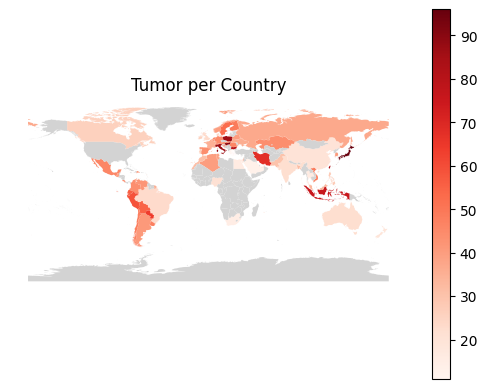

In [ ]:

df = pd.read_csv("../data/geoMap.csv")
df["Tumor"] = pd.to_numeric(df["Tumor"], errors="coerce")

# 2) Carica la mappa mondiale
world = gpd.read_file("../maps/countries.geojson")

# 3) Unisci i dati con la mappa
merged = world.merge(df, left_on="ADMIN", right_on="Country", how="left")

# 4) Plot della mappa
plt.figure(figsize=(14, 10))
merged.plot(
    column="Tumor",
    cmap="Reds",
    legend=True,
    missing_kwds={"color": "lightgrey", "label": "No data"}
)
plt.title("Tumor Google Searches per Country")
plt.axis("off")
plt.show()


In [7]:
print(world.columns)


Index(['ADMIN', 'ISO_A3', 'geometry'], dtype='object')
